In [60]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [61]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

In [62]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [63]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [64]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [65]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

In [67]:
model.compile(optimizer='adam',  # or optimizer='adam' without config parameters
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [69]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.4406 - loss: 1.6092 - val_accuracy: 0.5806 - val_loss: 1.1764
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6556 - loss: 0.9811 - val_accuracy: 0.5846 - val_loss: 1.1913
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7100 - loss: 0.8287 - val_accuracy: 0.6073 - val_loss: 1.1847
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7460 - loss: 0.7281 - val_accuracy: 0.5453 - val_loss: 1.4719
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7685 - loss: 0.6642 - val_accuracy: 0.6738 - val_loss: 0.9946
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.7933 - loss: 0.5885 - val_accuracy: 0.7072 - val_loss: 0.8416
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8138 - loss: 0.5316 - val_accuracy: 0.7470 - val_loss: 0.7574
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.8347 - loss: 0.4748 - 

In [70]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7556 - loss: 0.7064
Test accuracy: 0.7630000114440918


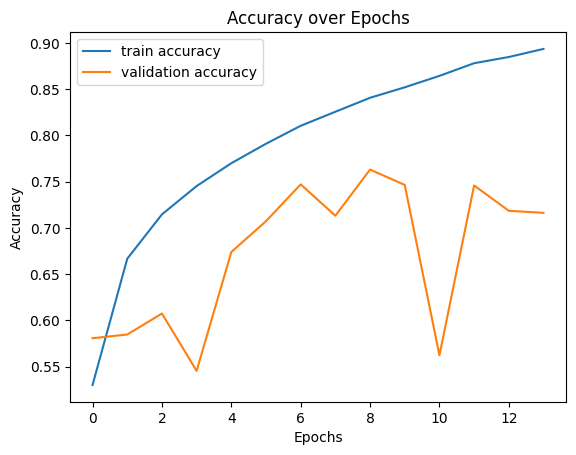

In [71]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

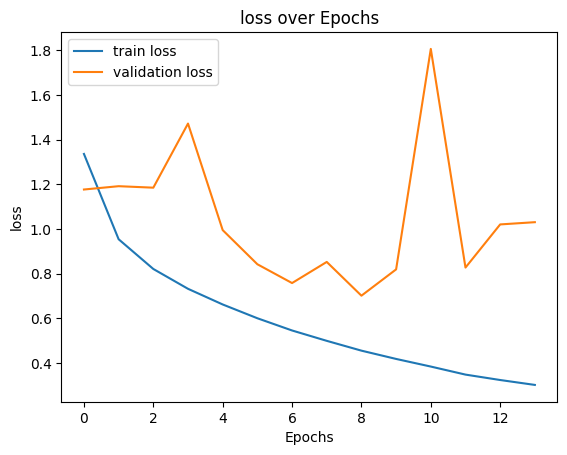

In [72]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title("loss over Epochs")
plt.show()